<a href="https://colab.research.google.com/github/Gasijiyo/FirstStep_Python/blob/master/py25_movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 파일이 저장된 경로
movies_file = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/movies.dat'

* movies.dat 파일을 읽고, DataFrame 생성.
* DataFrame 탐색.
* 장르가 `Animation`인 영화는 몇 개?
* 장르가 로멘틱코미디인 영화는 몇 개?
* 어떤 장르의 영화가 가장 많은가?

In [3]:
col_names=['movie_no', 'title', 'genres']

In [4]:
movies = pd.read_csv(movies_file, sep='::', engine='python',names=col_names)

In [5]:
movies

,movie_no,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_no  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [7]:
movies.head()

,movie_no,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movies.tail()

,movie_no,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [9]:
# Animation 장르의 영화
animations = movies[movies['genres'].str.contains('Animation')]
animations

,movie_no,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
12,13,Balto (1995),Animation|Children's
47,48,Pocahontas (1995),Animation|Children's|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children's|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children's
...,...,...,...
3690,3759,Fun and Fancy Free (1947),Animation|Children's|Musical
3706,3775,Make Mine Music (1946),Animation|Children's|Musical
3707,3776,Melody Time (1948),Animation|Children's|Musical
3730,3799,Pokémon the Movie 2000 (2000),Animation|Children's


In [10]:
len(animations)

105

In [11]:
# 로맨틱 코미디 장르 - 장르 컬럼에 'Romance'와 'Comedy'가 포함되어 있는 영화들.
ro_co = movies[(movies['genres'].str.contains('Comedy')) &
                (movies['genres'].str.contains('Romance'))]
ro_co

,movie_no,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
38,39,Clueless (1995),Comedy|Romance
63,64,Two if by Sea (1996),Comedy|Romance
...,...,...,...
3679,3748,"Match, The (1999)",Comedy|Romance
3759,3829,Mad About Mambo (2000),Comedy|Romance
3804,3874,"Couch in New York, A (1996)",Comedy|Romance
3815,3885,Love & Sex (2000),Comedy|Romance


In [12]:
len(ro_co)

204

In [13]:
# 가장 많이 나오는 장르
genres = []
for s in movies['genres']:
    genres.extend(s.split(sep='|'))
len(genres)

6408

In [14]:
# value_counts() 는 pandas의 메소드, 
# series나 dataframe 형식만 사용 가능.
genre_counts = pd.value_counts(genres)
genre_counts

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64

In [15]:
# 장르 상위 7개 시각화
top7 = genre_counts.head(n=7)
top7

Drama        1603
Comedy       1200
Action        503
Thriller      492
Romance       471
Horror        343
Adventure     283
dtype: int64

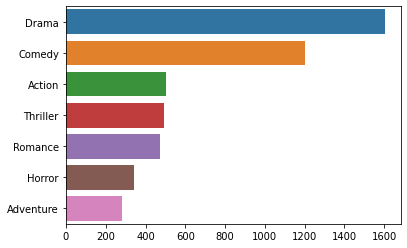

In [16]:
sns.barplot(x=top7.values, y=top7.index)
plt.show()

In [17]:
bottom7 = genre_counts.tail(n=7)
bottom7

Documentary    127
Musical        114
Mystery        106
Animation      105
Fantasy         68
Western         68
Film-Noir       44
dtype: int64

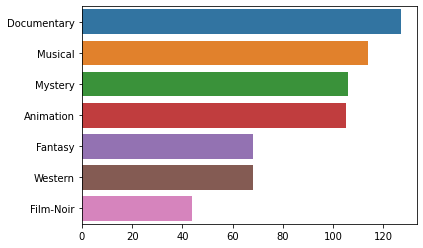

In [18]:
sns.barplot(x=bottom7.values, y=bottom7.index)
plt.show()

In [19]:
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['genre', 'counts']
genre_counts_df

,genre,counts
0,Drama,1603
1,Comedy,1200
2,Action,503
3,Thriller,492
4,Romance,471
5,Horror,343
6,Adventure,283
7,Sci-Fi,276
8,Children's,251
9,Crime,211


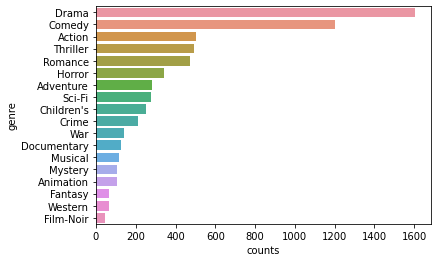

In [20]:
sns.barplot(x='counts', y='genre', data=genre_counts_df)
plt.show()

In [21]:
# 연도별 영화 개봉 숫자 시각화

# 1. 연도 데이터 추출
year = []
for y in movies['title']:    
    year.append(y[-5:-1])
year

['1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1994',
 '1995',
 '1994',
 '1995',
 '1995',
 '1995',
 '1995',
 '1994',
 '1995',
 '1995',
 '1996',
 '1995',
 '1996',
 '1996',
 '1996',
 '1996',
 '1995',
 '1995',
 '1995',
 '1996',
 '1995',
 '1995',
 '1995',
 '1996',
 '1996',
 '1995',
 '1995',
 '1995',
 '1996',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1996',
 '1996',
 '1996',
 '1995',
 '1995',
 '1996',
 '1995',
 '1996',
 '1996',
 '1995',
 '1995',
 '1994',
 '1995',
 '1996',
 '1996',
 '1996',
 '1996',
 '1996',
 '1995',
 '1994',
 '1996',
 '1995',
 '1995',
 '1995',
 '1976',
 '1995',
 

In [22]:
year_count = pd.value_counts(year)
year_count

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1923      3
1919      3
1922      2
1920      2
1921      1
Length: 81, dtype: int64

In [23]:
# 2. 연도 데이터 만들기 (연도 내림차순)
year_count_df = year_count.reset_index()
year_count_df.columns = ['year', 'count']
year_count_order = year_count_df.sort_values('year')
year_count_order

,year,count
77,1919,3
79,1920,2
80,1921,1
78,1922,2
76,1923,3
...,...,...
0,1996,345
3,1997,315
2,1998,337
4,1999,283


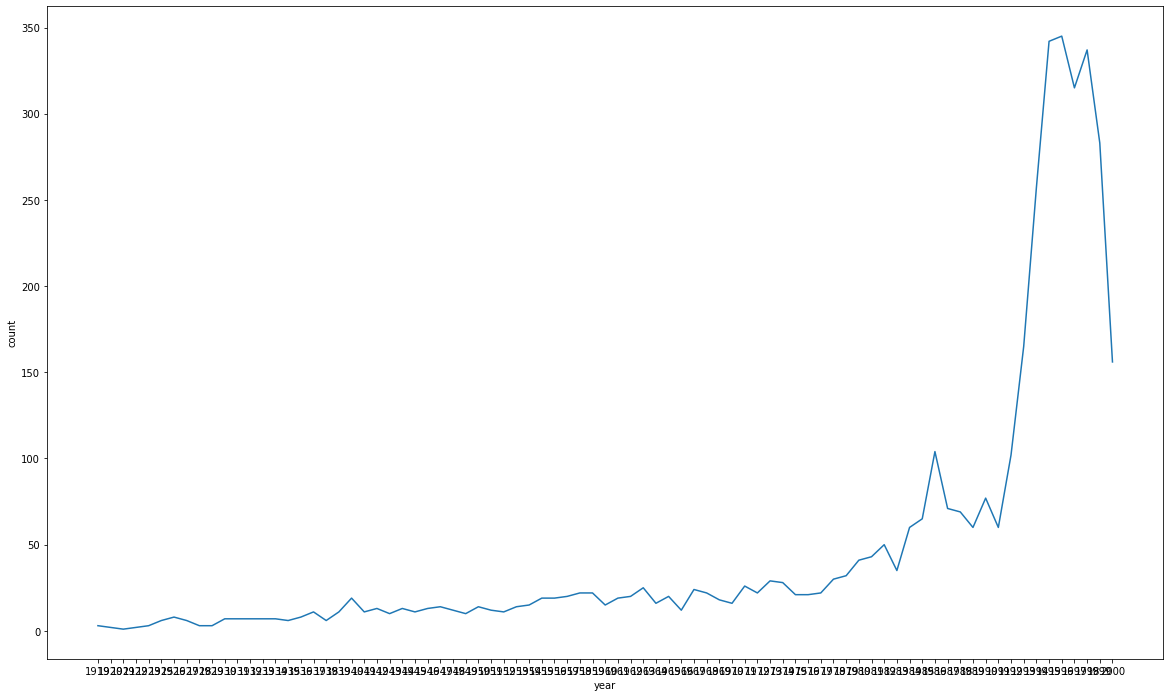

In [24]:
# 3. 시각화 (line)
fig, ax = plt.subplots(figsize=(20,12))
sns.lineplot(x='year', y='count', data=year_count_order)
plt.show()

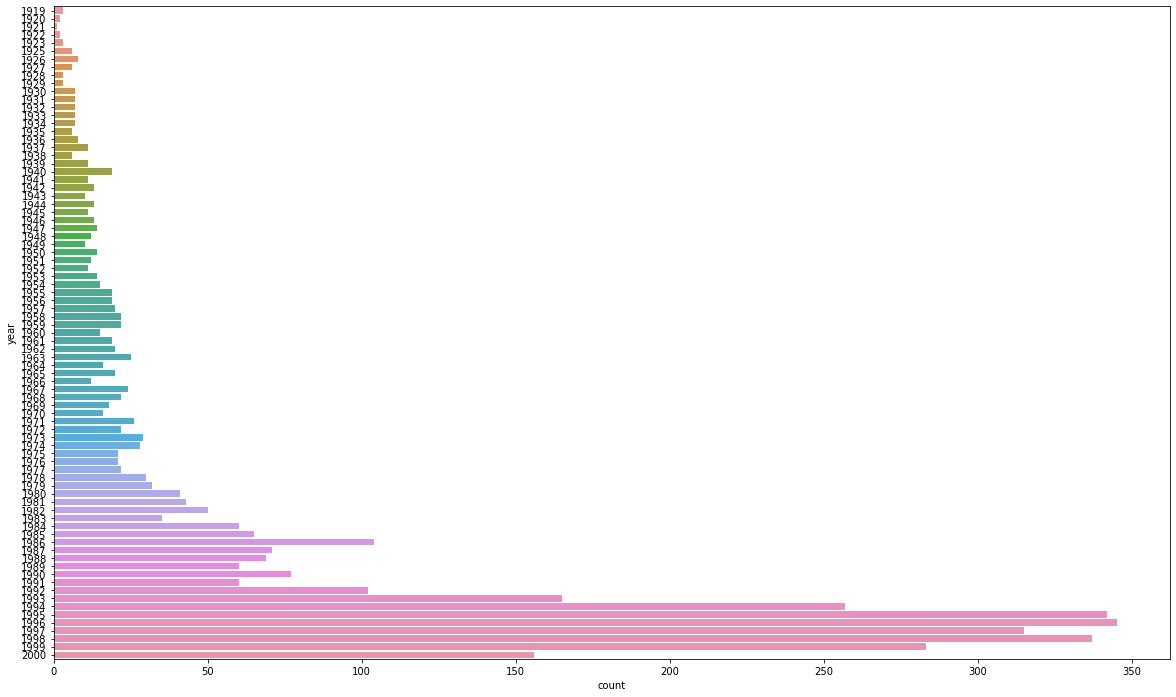

In [25]:
# 시각화 (bar)
fig, ax = plt.subplots(figsize=(20,12))
sns.barplot(x='count', y='year', data=year_count_order)
plt.show()

In [27]:
# 선생님 과제답안 :

# 영화 제목 컬럼에서 연도에 해당하는 4자리 문자열을 잘라내고 
# 정수타입으로 변환해서 새로운 컬럼을 만듦.
movies['year'] = movies['title'].str[-5:-1].astype('int')
movies

,movie_no,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [28]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_no  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
 3   year      3883 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 121.5+ KB


In [29]:
year_counts = movies['year'].value_counts()
year_counts

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1923      3
1919      3
1922      2
1920      2
1921      1
Name: year, Length: 81, dtype: int64

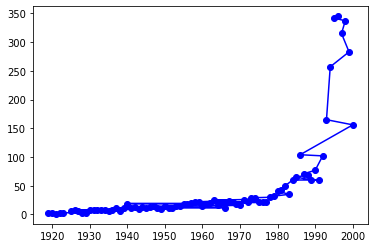

In [30]:
plt.plot(year_counts.index, year_counts.values, 'bo-')
plt.show()
# 이렇게 하면 연도별 데이터 정렬이 안 되어있음.

In [32]:
year_counts = year_counts.sort_index() # Series를 인덱스의 오름차순 정렬 후 저장
year_counts

1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: year, Length: 81, dtype: int64

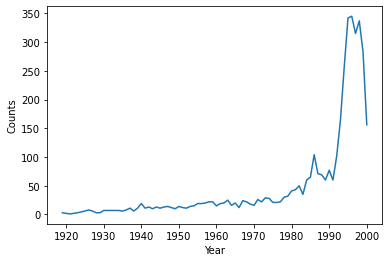

In [36]:
plt.plot(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Counts')
plt.show()

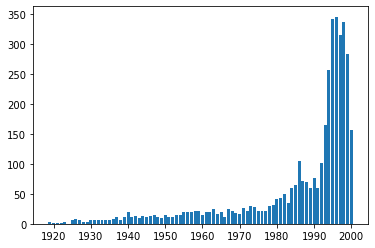

In [38]:
plt.bar(x=year_counts.index, height=year_counts.values)
plt.show()